In [30]:
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# read json file
with open("gemini-1.5-pro_slow_500 times.json", "r", encoding="utf-8") as file:
    data=json.load(file)

# extract "responses" from the file
responses=data["responses"] 

parsed_responses=[]
for response in responses:
    if isinstance(response, str):  # if it is a string, then parse it into dictionary
        try:
            parsed_responses.append(json.loads(response))
        except json.JSONDecodeError:
            print("无法解析响应为JSON：", response) # catch errors by "try-excpet"
    elif isinstance(response, dict):  # for the situation that it has already been dictonary
        parsed_responses.append(response)

print(parsed_responses)

无法解析响应为JSON： **Sorted Options:**
1. e
2. a
3. d
4. b
5. c

**Reasoning:**
1. **Reasons for Selection Order:** The ranking is based on the principles of probability.  Option 'e' (either a or b) is the most probable because it encompasses the possibilities of 'a', 'b', and 'c'. Option 'a' is ranked higher than 'b' due to the description of Linda, which suggests a higher likelihood of her being a feminist.  Option 'd' (a but not b) is next, followed by 'b', and lastly 'c' (both a and b), as the conjunction of two events is always less probable than either event alone.

2. **Reasoning Steps:**
    * **Step 1: Solve Math Problem:** 3 + 2 = 5 apples. (This was to prime for analytical thinking).
    * **Step 2: Define Events:**
        * A = Linda is active in the feminist movement.
        * B = Linda is a bank teller.
    * **Step 3: Analyze Options:**
        * a: P(A)
        * b: P(B)
        * c: P(A and B)
        * d: P(A and not B)
        * e: P(A or B) = P(A) + P(B) - P(A and B)
  

In [34]:
# extract the option from responses
sorted_options = []
for response in responses:
    if "**Sorted Options:**" in response:
        sorted_part=response.split("**Sorted Options:**")[1].split("\n\n")[0].strip() # extract the content after "**Sorted Options:**" but before "\n\n"
        orders=[line.split(".")[1].strip() for line in sorted_part.split("\n")] # extract options
        sorted_options.append(orders)

# Create a counter at each ordinal position and count the number of times the option appears in each position
orders_counts= {order: Counter() for order in range(1, 6)}
for orders in sorted_options:
    for i, option in enumerate(orders, 1):
        orders_counts[i][option]+=1
orders_counts

{1: Counter({'e': 343, 'a': 157}),
 2: Counter({'a': 343, 'e': 157}),
 3: Counter({'d': 500}),
 4: Counter({'b': 500}),
 5: Counter({'c': 500})}

In [36]:
# create a dataframe
orders_data = {f"Order {order}": dict(counts) for order, counts in orders_counts.items()}
df = pd.DataFrame(orders_data).fillna(0)

df1= df.T # tranpose the row and column

In [38]:
#caculate the intersection error and union error
intersection_error_count= 0  
union_error_count= 0         
total_responses= len(sorted_options)

for orders in sorted_options:
    if orders.index('c') < orders.index('b'):
        intersection_error_count +=1
        
    if orders.index('a')< orders.index('e'):
       union_error_count +=1


intersection_error_prob= "%.2f%%"%((intersection_error_count / total_responses)*100)
union_error_prob= "%.2f%%"%((union_error_count / total_responses)*100)


print("The probability of intersection error is:",intersection_error_prob)
print("The probability of union error is:",union_error_prob)

The probability of intersection error is: 0.00%
The probability of union error is: 31.40%


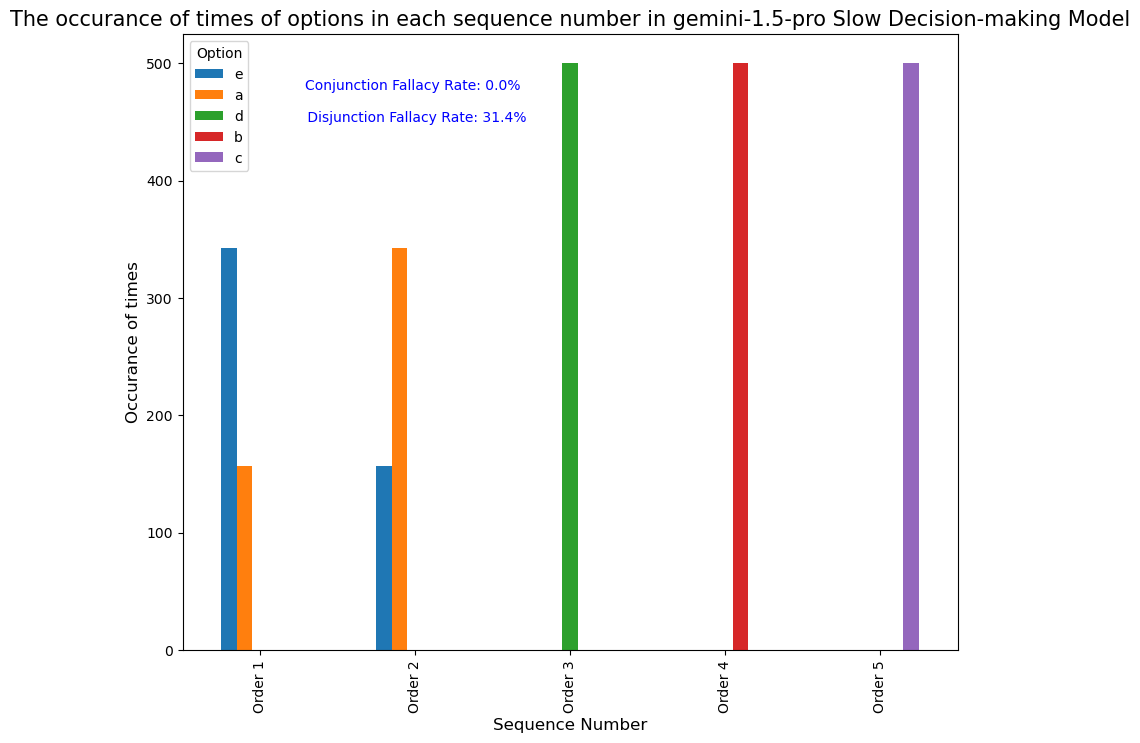

In [40]:
df1.plot(kind="bar", figsize=(10, 8))
plt.title("The occurance of times of options in each sequence number in gemini-1.5-pro Slow Decision-making Model",fontsize=15)
plt.xlabel("Sequence Number",fontsize=12)
plt.ylabel("Occurance of times",fontsize=12)
plt.legend(title="Option")
plt.text(1,450,"Conjunction Fallacy Rate: 0.0% \n\n Disjunction Fallacy Rate: 31.4%",ha="center",fontdict={"color":"blue"})
plt.show()